In [1]:
## Tunes depth profiles of simulation from DanSims1 and the NPLD to each other using dynamic time warping algorithm
## Depth profiles should be .csv files located in ./data/DanSims1 and ./data/NPLD
## Plots tunings and computes cross-correlation
## Tests XC value against XC's from tunings to random profiles

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd
import glob
from radarfuncs import *
from DTWfuncs import *
from lmfit.models import SkewedGaussianModel

In [3]:
#Import csv files -- Simulations
csv_import = glob.glob("data/DanSims1/signal_tot.csv")
sim_column_names = [str(i) for i in list(range(1,101))]

csv = pd.read_csv(csv_import[0], names=sim_column_names, skiprows=0) 
df = pd.DataFrame(csv)
df_10 = df.copy()

for col in df_10.columns:
    df_10[col].values[:] = 10    
    
df_lin = df_10.pow(df/10) #dB to linear conversion

df.insert(0, "Depth_px", list(range(0,601)), True)
df_lin.insert(0, "Depth_px", list(range(0,601)), True)

display(df_lin)

x_list_s = []
y_list_s = []
fit_list_s = []

for i in sim_column_names: 
    sample_strat = i
    #x = df["Depth_px"].to_list()
    #y = df[i].to_list()
    
    x = df_lin["Depth_px"].to_list()
    y = df_lin[i].to_list()
    
    
    peak = y.index(max(y[0:50])) #finds surface return
    surf = x[peak] #location of surface return
    
    #x = x[peak+5:]
    #y = y[peak+5:]
    
    x = x[peak+5:450] #remove weird end spike
    y = y[peak+5:450] # remove weird end spike
    
    x_list_s.append(x)
    y_list_s.append(y)
    
#     ##compute line to fit synthetic data to
#     # Skewed Gaussian fit
#     model = SkewedGaussianModel()
#     params = model.make_params(amplitude=(max(y)), center=min(x)+20, sigma=20, gamma=1.5)
#     result = model.fit(y, params, x=x)
#     fit = result.best_fit +np.mean(y[-150:]) # prevents fit from damping out all of the noise on right-handed side
    
#     fit_list_s.append(fit)



#Import csv files -- NPLD
csv_importn = glob.glob("data/NPLD/*zoom.csv")
csv_importn = sorted(csv_importn, key=lambda x: int(x[-10]+x[-9]))
#csv_importn = csv_importn[3:4]+csv_importn[7:8]

column_names = ['depth', 'value']
x_listn = []
y_listn = []
fit_listn = []

#load data and put into lists
for i in csv_importn:
    csv = pd.read_csv(i, names=column_names, skiprows=2) #skips headers
    
    x = csv.depth.to_list()
    y = csv.value.to_list()
    
    peak = y.index(max(y[0:50])) #finds surface return
    
    x = x[peak+5:]
    y = y[peak+5:]
    
    #convert pixels to meters
    #x = p2m_waterice(x)
    
    x_listn.append(x)
    y_listn.append(y)
    
    ##compute line to fit synthetic data to
    # Skewed Gaussian fit
    model = SkewedGaussianModel()
    params = model.make_params(amplitude=(max(y)), center=min(x)+20, sigma=20, gamma=1.5)
    result = model.fit(y, params, x=x)
    fit = result.best_fit +np.mean(y[-150:]) # prevents fit from damping out all of the noise on right-handed side
    
    fit_listn.append(fit)
    
print(csv_importn)


,Depth_px,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,2.527829e-09,2.492338e-09,2.453313e-09,2.581473e-09,2.119098e-09,1.943812e-09,2.478004e-09,2.440159e-09,2.669873e-09,...,2.588679e-09,2.819646e-09,2.477837e-09,2.634057e-09,2.136522e-09,2.995882e-09,2.499320e-09,2.472605e-09,2.531874e-09,2.485759e-09
1,1,4.356439e-13,1.040038e-15,9.688750e-12,9.552149e-13,3.560573e-11,4.341576e-11,5.754444e-15,3.677112e-12,1.976156e-12,...,2.023206e-12,2.047970e-11,3.127504e-11,1.061701e-11,1.707137e-11,1.583982e-11,2.776477e-13,3.092407e-13,3.856156e-12,1.952268e-15
2,2,4.180275e-09,4.129803e-09,4.396579e-09,4.250198e-09,4.122805e-09,3.854651e-09,4.098568e-09,4.251645e-09,4.237625e-09,...,4.114152e-09,5.068821e-09,3.569125e-09,4.606213e-09,3.849103e-09,5.273591e-09,4.149707e-09,4.086167e-09,4.344434e-09,4.117624e-09
3,3,3.213968e-09,3.162856e-09,2.951722e-09,3.162420e-09,2.456912e-09,2.286898e-09,3.153398e-09,3.005316e-09,3.420183e-09,...,3.351360e-09,3.359344e-09,3.444423e-09,3.191280e-09,2.703038e-09,3.500777e-09,3.167218e-09,3.153931e-09,3.120576e-09,3.157713e-09
4,4,1.240312e-09,1.231104e-09,1.519662e-09,1.305584e-09,1.679541e-09,1.587214e-09,1.216424e-09,1.397293e-09,1.171538e-09,...,1.120469e-09,1.816969e-09,7.703647e-10,1.543905e-09,1.267677e-09,1.809480e-09,1.242005e-09,1.208977e-09,1.398297e-09,1.226360e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,596,2.557440e-08,8.420263e-10,2.429106e-05,1.002468e-05,5.728324e-05,2.571080e-05,4.885053e-09,3.880018e-06,4.997475e-08,...,6.643868e-06,1.278232e-05,7.197699e-06,8.066761e-06,4.816897e-06,3.721974e-05,2.111984e-07,6.883652e-06,3.093894e-05,4.836501e-11
597,597,2.220689e-08,2.433964e-09,1.740053e-05,3.510864e-06,4.626872e-05,4.642023e-06,4.252321e-10,3.756600e-06,1.551071e-06,...,4.520807e-06,1.007303e-05,1.837076e-05,8.729395e-06,1.460803e-06,2.109523e-05,1.740040e-07,8.694472e-06,6.068282e-05,2.736146e-11
598,598,1.685442e-08,4.306815e-09,8.541006e-06,1.945100e-06,4.083748e-05,1.123133e-05,3.729216e-10,2.449112e-06,6.484772e-06,...,1.909203e-06,4.815307e-06,3.225800e-05,7.008329e-06,1.757289e-07,5.617593e-06,1.021538e-07,7.813074e-06,9.791527e-05,2.651503e-11
599,599,1.932615e-08,5.268444e-09,2.045775e-06,1.537119e-05,3.817421e-05,4.311170e-05,8.911574e-10,7.564733e-07,1.199926e-05,...,4.496062e-07,4.628522e-06,4.057793e-05,3.503894e-06,4.329011e-07,5.612902e-07,4.282222e-08,4.795018e-06,1.215489e-04,2.795174e-11


['data/NPLD/S_00429802_01zoom.csv', 'data/NPLD/S_00429802_02zoom.csv', 'data/NPLD/S_00429802_03zoom.csv', 'data/NPLD/S_00429802_04zoom.csv', 'data/NPLD/S_00325703_05zoom.csv', 'data/NPLD/S_00325703_06zoom.csv', 'data/NPLD/S_00325703_07zoom.csv', 'data/NPLD/S_00480901_08zoom.csv', 'data/NPLD/S_00480901_09zoom.csv', 'data/NPLD/S_00480901_10zoom.csv', 'data/NPLD/S_00266002_11zoom.csv', 'data/NPLD/S_00266002_12zoom.csv', 'data/NPLD/S_00266002_13zoom.csv', 'data/NPLD/S_00266002_14zoom.csv', 'data/NPLD/S_00266002_15zoom.csv', 'data/NPLD/S_00266002_16zoom.csv', 'data/NPLD/S_00266002_17zoom.csv', 'data/NPLD/S_00202201_18zoom.csv', 'data/NPLD/S_00202201_19zoom.csv', 'data/NPLD/S_00202201_20zoom.csv', 'data/NPLD/S_00202201_21zoom.csv', 'data/NPLD/S_00202201_22zoom.csv', 'data/NPLD/S_00471302_23zoom.csv', 'data/NPLD/S_00471302_24zoom.csv', 'data/NPLD/S_00471302_25zoom.csv', 'data/NPLD/S_00471302_26zoom.csv', 'data/NPLD/S_00325703_27zoom.csv', 'data/NPLD/S_00325703_28zoom.csv', 'data/NPLD/S_004298

XC of Sim1 and data/NPLD/S_00429802_01zoom.csv: 0.21849580742523414
Avg XC of Sim1 and 1000 random profiles:0.0638870896867059. 95% threshold:0.09598592042223293
XC of Sim1 and data/NPLD/S_00429802_02zoom.csv: 0.10843605867533745
Avg XC of Sim1 and 1000 random profiles:-0.03706990082154137. 95% threshold:0.025639248544406988
XC of Sim1 and data/NPLD/S_00429802_03zoom.csv: 0.14308770460699083
Avg XC of Sim1 and 1000 random profiles:-0.01120133044773786. 95% threshold:0.06418525754911003
XC of Sim1 and data/NPLD/S_00429802_04zoom.csv: 0.13618747248895482
Avg XC of Sim1 and 1000 random profiles:-0.05310985389932283. 95% threshold:0.012452800021491177
XC of Sim1 and data/NPLD/S_00325703_05zoom.csv: 0.11412717041965206
Avg XC of Sim1 and 1000 random profiles:0.062051860041872194. 95% threshold:0.10858021131158604
XC of Sim1 and data/NPLD/S_00325703_06zoom.csv: 0.035971772568466245
Avg XC of Sim1 and 1000 random profiles:-0.03581428769269775. 95% threshold:0.07944654043247808
XC of Sim1 and 

KeyboardInterrupt: 

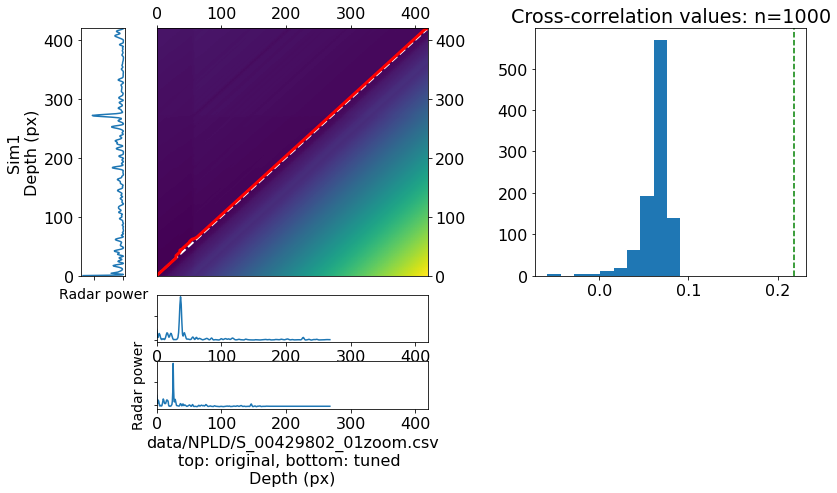

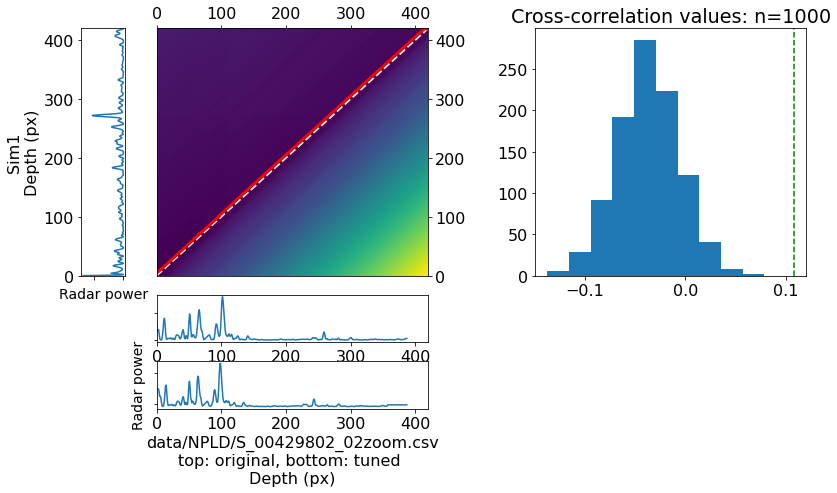

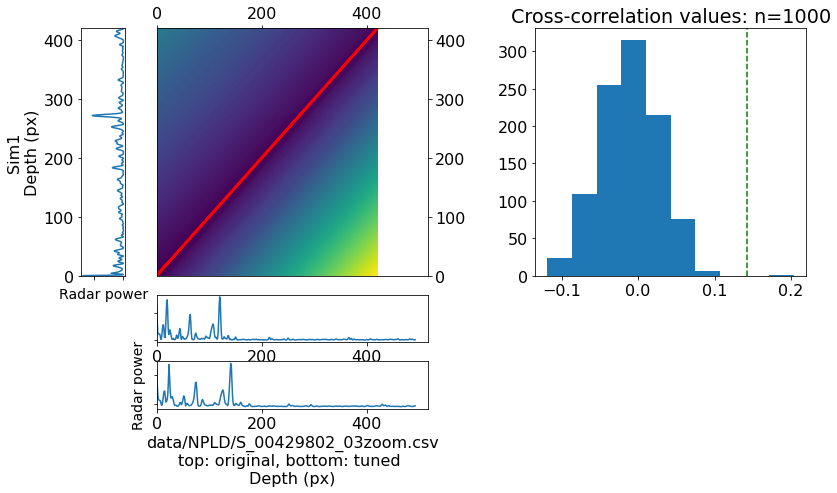

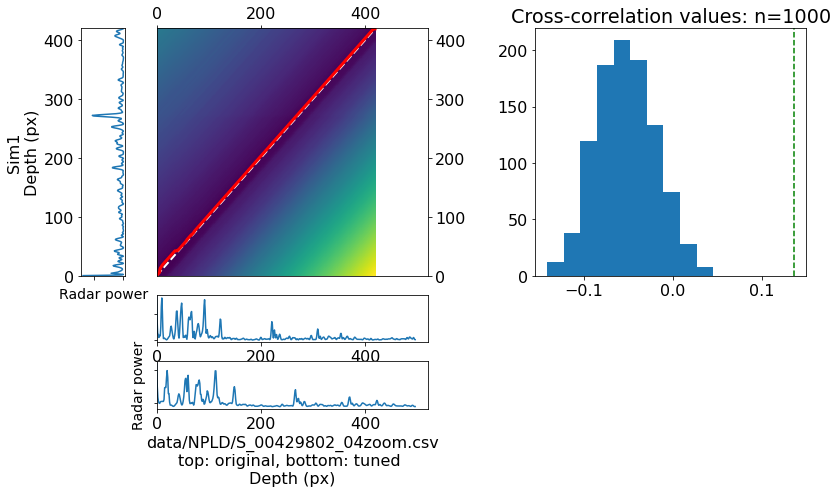

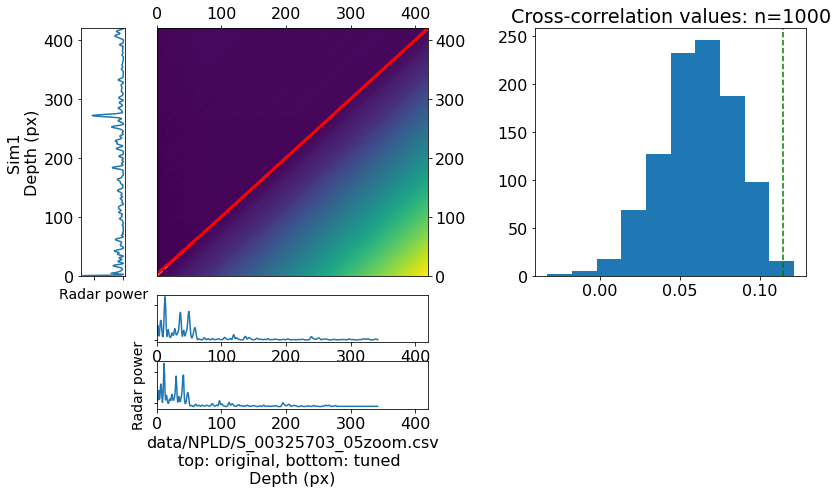

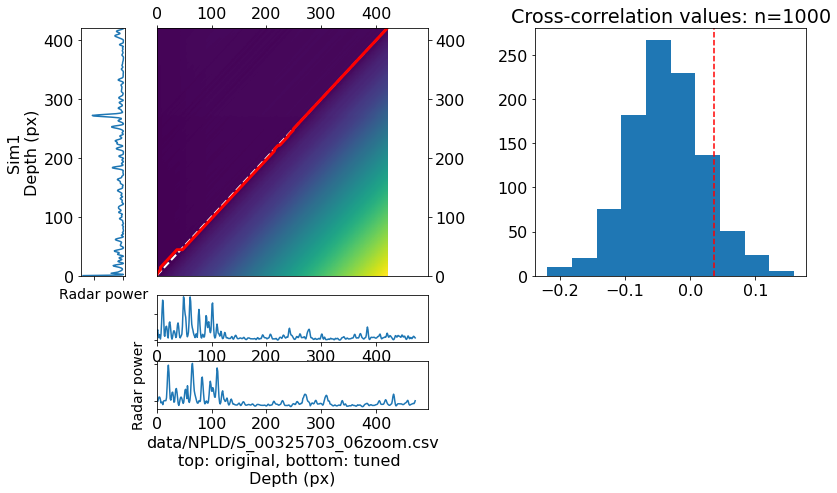

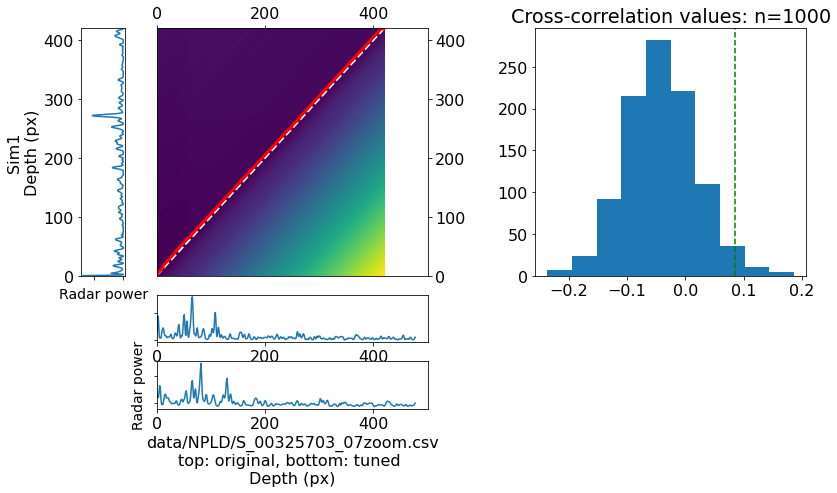

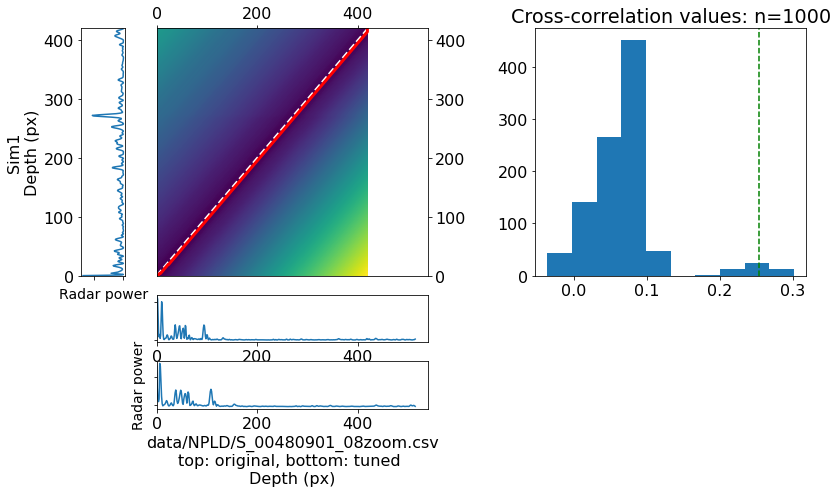

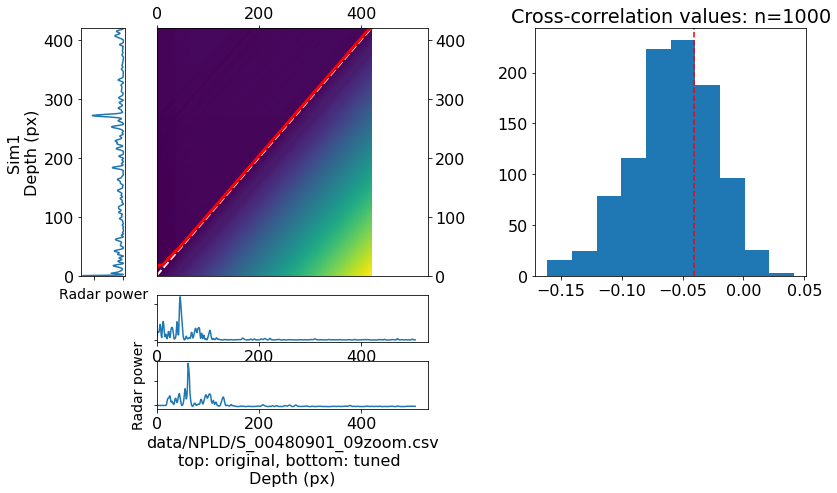

In [4]:
#Use DTW to tune each profile to the other profiles
#plot results, produce XC
GoodFit_list = []
BadFit_list = []

for i in range(len(sim_column_names)):
    #prof1 = csv_importk[i] #just used for titles
    prof1 = "Sim"+sim_column_names[i]
    d1 = x_list_s[i]
    v1 = y_list_s[i]
    #fit = fit_list_s[i]
    
    for j in range(len(csv_importn)):
        prof2 = csv_importn[j]
        d2 = x_listn[j]
        v2 = y_listn[j]
        fitn = fit_listn[j]
            
        xtune, XC, tstd, dt, W, D, tx = dtw_mars(v1,v2)
        #print(W)
        #np.savetxt('cost_'+str(i)+str(j)+'.csv', D, delimiter=',')
        
        #Run MonteCarlo simulation to assess quality of tunings
        #A strong match is when real XC is nigher than 90% of all XCs from tunings to random profiles

        XC_rs = [] #holds cross correlation values for 1000 random profiles
        syn = []
        #W_rs = []
        
        for a in range(1000):
            r=ar1(d2,v2,fitn) #this creates a random synthetic record with similar properties
            syn.append(r)
            xtune_r, XC_r, tstd_r, dt_r, W_r, D_r, tx_r = dtw_mars(v1,r)
            XC_rs.append(XC_r)
            #W_rs.append(W_r)
            
        #check if correlation is good
        XC_mean = np.mean(XC_rs)
        XC_95 = XC_mean + 2*np.std(XC_rs)
        GoodFit = False
        if XC >= XC_95:
            GoodFit = True
        
        # Set up the axes with gridspec
        plt.rcParams.update({'font.size': 16})
        fig = plt.figure(figsize=(13,7))
        grid = plt.GridSpec(6, 10, hspace=0.4, wspace=0.7)
        main = fig.add_subplot(grid[:-2, 1:5])
        y_prof = fig.add_subplot(grid[:-2, 0], xticklabels=[], sharey=main)
        x_prof = fig.add_subplot(grid[-2, 1:5], yticklabels=[], sharex=main)
        hist = fig.add_subplot(grid[:-2,6:])
        x_tune = fig.add_subplot(grid[-1, 1:5], yticklabels=[], sharex=main)
        

        # DTW min path on main
        main.pcolor(D)
        main.plot([0,len(v1)-1], [0,len(xtune)-1],'w--', linewidth=2)
        main.plot(W[:,1], W[:,0],'r-', linewidth=3)
        main.xaxis.tick_top()
        main.yaxis.tick_right()

        # x profile -- what gets tuned
        xax= np.subtract(d2,d2[0])
        x_prof.plot(xax, v2)
        #x_prof.set_xlabel(prof2)
        #x_prof.set_ylabel("Radar power")

        #y profile -- fixed
        yax = np.subtract(d1,d1[0])
        y_prof.plot(np.multiply(-1,v1),yax)
        y_prof.set_ylabel(prof1 + "\nDepth (px)")
        y_prof.set_xlabel("Radar power", fontsize = 14)
        
        #X profile -- tuned
        xax= np.subtract(tx,tx[0])
        x_tune.plot(xax, xtune)
        x_tune.set_xlabel(prof2 + "\ntop: original, bottom: tuned \nDepth (px)")
        x_tune.set_ylabel("Radar power", fontsize = 14)
    
        # histogram of XC values
        hist.hist(XC_rs) #bins = n_bins
        hist.set_title("Cross-correlation values: n="+str(len(XC_rs)))
        if GoodFit == False:
            hist.axvline(x = XC, color = 'r', ls='--')
            BadFit_list.append("SIM"+sim_column_names[i]+"N"+str(j+1))
        else:
            hist.axvline(x = XC, color = 'g', ls = '--')
            GoodFit_list.append("SIM"+sim_column_names[i]+"N"+str(j+1))
        
        fig.savefig("SIM"+sim_column_names[i]+"N"+str(j+1)+".png")
        
        print("XC of "+prof1+" and "+prof2+": "+str(XC))
        print("Avg XC of "+prof1+ " and 1000 random profiles:"+str(XC_mean)+ ". 95% threshold:"+str(XC_95))
print("# Good Fits: "+ len(GoodFit_list))
print(GoodFit_list)
print("# Bad Fits: "+ len(BadFit_list))
print(BadFit_list)

